<a href="https://colab.research.google.com/github/rafaelchamorro/Challenge2-Desafio-TelecomX/blob/main/ETL_Desafio_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de datos

In [13]:
import pandas as pd

# URL de la API
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos directamente desde la API y convertirlos a DataFrame
df_telecom = pd.read_json(api_url)


# Mostrar las primeras filas del DataFrame para verificar la carga
print(df_telecom.head())

# Mostrar información general del DataFrame
df_telecom.info()


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [14]:
# prompt: explora los datos df_telecom para Explorar las columnas del dataset y verificar sus tipos de datos.

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df_telecom.head())

# Mostrar información general del DataFrame
df_telecom.info()

# Explorar las columnas y sus tipos de datos
print("\nColumnas y tipos de datos:")
df_telecom.dtypes

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [15]:
# Lista de columnas relevantes identificadas
columnas_relevantes = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Charges.Monthly',
    'Charges.Total'
]

# Crear un nuevo DataFrame con las columnas relevantes
df_telecom_relevante = df_telecom_expanded[columnas_relevantes].copy()

# Mostrar las primeras filas del nuevo DataFrame
print("Primeras filas del DataFrame con columnas relevantes:")
print(df_telecom_relevante.head())

# Mostrar información del nuevo DataFrame para verificar las columnas y tipos de datos
print("\nInformación del DataFrame con columnas relevantes:")
df_telecom_relevante.info()

Primeras filas del DataFrame con columnas relevantes:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes  

Comprobación de incoherencias en los datos

In [16]:
import pandas as pd
# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df_telecom_relevante.isnull().sum())

# Verificar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df_telecom_relevante.duplicated().sum())

# Verificar valores únicos en columnas categóricas para identificar inconsistencias
columnas_categoricas = df_telecom_relevante.select_dtypes(include='object').columns
print("\nValores únicos en columnas categóricas:")
for col in columnas_categoricas:
    print(f"- {col}: {df_telecom_relevante[col].unique()}")

# Verificar el tipo de datos de las columnas numéricas y buscar posibles errores de formato
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\nTipos de datos de columnas numéricas:")
print(df_telecom_relevante[columnas_numericas].dtypes)

# Intentar convertir 'Charges.Total' a numérico para identificar errores de formato
# Los errores de formato en esta columna (como espacios en blanco) pueden causar problemas.
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("\nLa columna 'Charges.Total' se convirtió a numérico exitosamente.")
except ValueError as e:
    print(f"\nError al convertir 'Charges.Total' a numérico: {e}")
    print("Esto puede indicar la presencia de valores no numéricos (ej. espacios en blanco) en la columna.")
    # Identificar los valores que no se pudieron convertir
    invalid_charges_total = df_telecom_relevante[pd.to_numeric(df_telecom_relevante['Charges.Total'], errors='coerce').isna()]
    print("\nFilas con valores inválidos en 'Charges.Total':")
    print(invalid_charges_total)

# Resumen estadístico de columnas numéricas para detectar valores atípicos o errores
print("\nEstadísticas descriptivas de columnas numéricas:")
print(df_telecom_relevante[columnas_numericas].describe())



Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de filas duplicadas:
0

Valores únicos en columnas categóricas:
- customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
- Churn: ['No' 'Yes' '']
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet s

# Manejo inconsistencias

In [29]:
# Identificar filas con valores nulos en 'Charges.Total' después de la conversión
# Ahora también identificaremos cadenas vacías que causan errores de conversión
filas_con_nulos_o_vacios_charges = df_telecom_relevante[
    df_telecom_relevante['Charges.Total'].isnull() | (df_telecom_relevante['Charges.Total'] == ' ')
]

print("\nFilas identificadas con valores nulos o vacíos en 'Charges.Total' (antes de la corrección):")
print(filas_con_nulos_o_vacios_charges)

# Reemplazar cadenas vacías y rellenar valores nulos en 'Charges.Total' con 0.0
df_telecom_relevante['Charges.Total'] = df_telecom_relevante['Charges.Total'].replace(' ', '0.0')
df_telecom_relevante['Charges.Total'].fillna(0.0, inplace=True)


print("\nValores nulos después de rellenar:")
print(df_telecom_relevante.isnull().sum())

# Convertir 'Charges.Total' a numérico después de manejar los valores problemáticos
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("\nLa columna 'Charges.Total' se convirtió a numérico exitosamente después de la corrección.")
except ValueError as e:
    print(f"\nError al convertir 'Charges.Total' a numérico después de la corrección: {e}")


# Verificar que las filas que antes tenían nulos o vacíos ahora tienen 0.0 en 'Charges.Total'
print("\nFilas corregidas (verifying Charges.Total):")
print(df_telecom_relevante[df_telecom_relevante['customerID'].isin(filas_con_nulos_o_vacios_charges['customerID'])])


# Corregir el tipo de datos de 'SeniorCitizen' a booleano
# La columna 'SeniorCitizen' debería ser booleana (True/False) o numérica (0/1).
# Basado en los valores únicos (0 y 1), la convertimos a booleana.
# Verificar si la columna ya es booleana antes de intentar convertirla
if df_telecom_relevante['SeniorCitizen'].dtype != 'bool':
    df_telecom_relevante['SeniorCitizen'] = df_telecom_relevante['SeniorCitizen'].astype(bool)

# Verificar el tipo de datos después de la corrección
print("\nTipo de datos de 'SeniorCitizen' después de la corrección:")
print(df_telecom_relevante['SeniorCitizen'].dtype)


print("\nCorrecciones aplicadas. DataFrame listo para análisis.")
print("\nInformación final del DataFrame después de correcciones:")
df_telecom_relevante.info()

KeyError: 'Charges.Total'

# Columna Cuentas Diarias

In [18]:
# Se asume que un mes tiene aproximadamente 30 días para una estimación diaria
df_telecom_relevante['Cuentas_Diarias'] = df_telecom_relevante['Charges.Monthly'] / 30

# Mostrar las primeras filas con la nueva columna
print("\nDataFrame con la nueva columna 'Cuentas_Diarias':")
print(df_telecom_relevante[['Charges.Monthly', 'Cuentas_Diarias']].head())

# Verificar información para confirmar la nueva columna
df_telecom_relevante.info()


DataFrame con la nueva columna 'Cuentas_Diarias':
   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBack

# Análisis Descriptivo

In [33]:
# Lista de columnas relevantes identificadas con los nombres correctos
columnas_relevantes = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Charges.Monthly',
    'Charges.Total'
]

# Recrear el DataFrame con las columnas relevantes
# Asegurándose de que df_telecom_expanded está disponible y tiene estas columnas
if 'df_telecom_expanded' in locals():
    df_telecom_relevante = df_telecom_expanded[columnas_relevantes].copy()
else:
    # Si por alguna razón df_telecom_expanded no está, recargamos y expandimos
    import pandas as pd
    api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
    df_telecom = pd.read_json(api_url)
    customer_df = pd.json_normalize(df_telecom['customer'])
    phone_df = pd.json_normalize(df_telecom['phone'])
    internet_df = pd.json_normalize(df_telecom['internet'])
    account_df = pd.json_normalize(df_telecom['account'])
    df_telecom_expanded = pd.concat([df_telecom[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
    df_telecom_relevante = df_telecom_expanded[columnas_relevantes].copy()


# Mostrar información del nuevo DataFrame para verificar las columnas y tipos de datos
print("Información del DataFrame df_telecom_relevante después de ser recreado:")
df_telecom_relevante.info()

# Proceder con la limpieza y manejo de inconsistencias (código de la celda L2LF6Jj-WsIX modificado)

# Identificar filas con valores nulos o vacíos en 'Charges.Total'
filas_con_nulos_o_vacios_charges = df_telecom_relevante[
    df_telecom_relevante['Charges.Total'].isnull() | (df_telecom_relevante['Charges.Total'] == ' ')
]

print("\nFilas identificadas con valores nulos o vacíos en 'Charges.Total' (antes de la corrección):")
print(filas_con_nulos_o_vacios_charges)

# Reemplazar cadenas vacías y rellenar valores nulos en 'Charges.Total' con 0.0
df_telecom_relevante['Charges.Total'] = df_telecom_relevante['Charges.Total'].replace(' ', '0.0')
df_telecom_relevante['Charges.Total'].fillna(0.0, inplace=True)


print("\nValores nulos después de rellenar:")
print(df_telecom_relevante.isnull().sum())

# Convertir 'Charges.Total' a numérico después de manejar los valores problemáticos
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("\nLa columna 'Charges.Total' se convirtió a numérico exitosamente después de la corrección.")
except ValueError as e:
    print(f"\nError al convertir 'Charges.Total' a numérico después de la corrección: {e}")


# Verificar que las filas que antes tenían nulos o vacíos ahora tienen 0.0 en 'Charges.Total'
print("\nFilas corregidas (verifying Charges.Total):")
print(df_telecom_relevante[df_telecom_relevante['customerID'].isin(filas_con_nulos_o_vacios_charges['customerID'])])


# Corregir el tipo de datos de 'SeniorCitizen' a booleano
# Verificar si la columna ya es booleana antes de intentar convertirla
if df_telecom_relevante['SeniorCitizen'].dtype != 'bool':
    df_telecom_relevante['SeniorCitizen'] = df_telecom_relevante['SeniorCitizen'].astype(bool)

# Verificar el tipo de datos después de la corrección
print("\nTipo de datos de 'SeniorCitizen' después de la corrección:")
print(df_telecom_relevante['SeniorCitizen'].dtype)

# Crear la columna 'Cuentas_Diarias' después de asegurar que 'Charges.Monthly' es numérico
# Se asume que un mes tiene aproximadamente 30 días para una estimación diaria
if 'Charges.Monthly' in df_telecom_relevante.columns and pd.api.types.is_numeric_dtype(df_telecom_relevante['Charges.Monthly']):
    df_telecom_relevante['Cuentas_Diarias'] = df_telecom_relevante['Charges.Monthly'] / 30
    print("\nColumna 'Cuentas_Diarias' creada exitosamente.")
else:
    print("\nNo se pudo crear la columna 'Cuentas_Diarias'. Asegúrese de que 'Charges.Monthly' es numérico.")


print("\nCorrecciones aplicadas. DataFrame listo para análisis.")
print("\nInformación final del DataFrame después de correcciones:")
df_telecom_relevante.info()

Información del DataFrame df_telecom_relevante después de ser recreado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies  

/tmp/ipython-input-33-2410535657.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_relevante['Charges.Total'].fillna(0.0, inplace=True)


In [30]:
# Asegurarse de que 'SeniorCitizen' es de tipo booleano antes de continuar con la limpieza
if df_telecom_relevante['SeniorCitizen'].dtype != 'bool':
    df_telecom_relevante['SeniorCitizen'] = df_telecom_relevante['SeniorCitizen'].astype(bool)

print("Tipo de dato de 'SeniorCitizen' después de la corrección previa a la limpieza:")
print(df_telecom_relevante['SeniorCitizen'].dtype)

KeyError: 'SeniorCitizen'

In [34]:
# Realizar análisis descriptivo de las columnas numéricas
print("\nAnálisis Descriptivo de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].describe())

# Análisis descriptivo de columnas categóricas (conteo de valores)
print("\nConteo de Valores por Columna Categórica:")
# Assuming 'columnas_categoricas' is defined in a previous cell
columnas_categoricas = df_telecom_relevante.select_dtypes(include='object').columns
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df_telecom_relevante[col].value_counts())

# Análisis descriptivo de 'SeniorCitizen' (booleana)
print("\nConteo de Valores para SeniorCitizen:")
print(df_telecom_relevante['SeniorCitizen'].value_counts())

# Calcular la media de las columnas numéricas
print("\nMedia de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].mean())

# Calcular la mediana de las columnas numéricas
print("\nMediana de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].median())

# Calcular la desviación estándar de las columnas numéricas
print("\nDesviación Estándar de Columnas Numéricas:")
print(df_telecom_relevante[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].std())

# Calcular la moda para algunas columnas (numéricas o categóricas)
print("\nModa para algunas Columnas:")
print("tenure:", df_telecom_relevante['tenure'].mode()[0]) # [0] porque mode() puede devolver múltiples valores
print("Charges.Monthly:", df_telecom_relevante['Charges.Monthly'].mode()[0])
print("Contract:", df_telecom_relevante['Contract'].mode()[0])
print("PaymentMethod:", df_telecom_relevante['PaymentMethod'].mode()[0])

# Calcular el rango (Max - Min) para columnas numéricas
print("\nRango de Columnas Numéricas:")
print("tenure:", df_telecom_relevante['tenure'].max() - df_telecom_relevante['tenure'].min())
print("Charges.Monthly:", df_telecom_relevante['Charges.Monthly'].max() - df_telecom_relevante['Charges.Monthly'].min())
# Before calculating the range for total_charges, ensure it is numeric.
# Based on the previous cell's output, it seems 'total_charges' might still be an object type.
# I'll add a conversion here for robustness, although a more permanent fix was attempted earlier.
try:
    df_telecom_relevante['Charges.Total'] = pd.to_numeric(df_telecom_relevante['Charges.Total'])
    print("Charges.Total:", df_telecom_relevante['Charges.Total'].max() - df_telecom_relevante['Charges.Total'].min())
except ValueError:
     print("No se pudo calcular el rango para Charges.Total porque contiene valores no numéricos.")

print("Cuentas_Diarias:", df_telecom_relevante['Cuentas_Diarias'].max() - df_telecom_relevante['Cuentas_Diarias'].min())


Análisis Descriptivo de Columnas Numéricas:
            tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
count  7267.000000      7267.000000    7267.000000      7267.000000
mean     32.346498        64.720098    2277.182035         2.157337
std      24.571773        30.129572    2268.648587         1.004319
min       0.000000        18.250000       0.000000         0.608333
25%       9.000000        35.425000     396.200000         1.180833
50%      29.000000        70.300000    1389.200000         2.343333
75%      55.000000        89.875000    3778.525000         2.995833
max      72.000000       118.750000    8684.800000         3.958333

Conteo de Valores por Columna Categórica:

Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
      

# Distribucción de Evasión

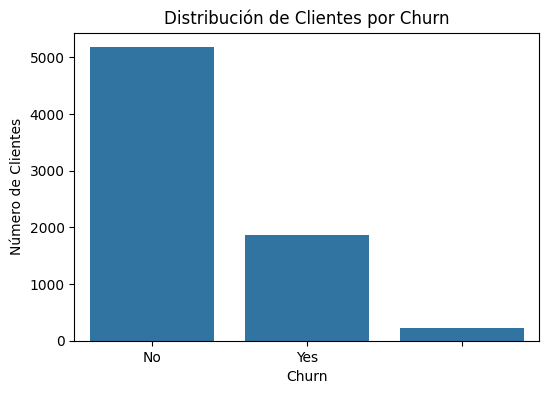


Porcentaje de Clientes por Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes en cada categoría de Churn
churn_counts = df_telecom_relevante['Churn'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

# Mostrar los porcentajes también
churn_percentages = df_telecom_relevante['Churn'].value_counts(normalize=True) * 100
print("\nPorcentaje de Clientes por Churn:")
print(churn_percentages)

# Recuento de evasión por variables categóricas


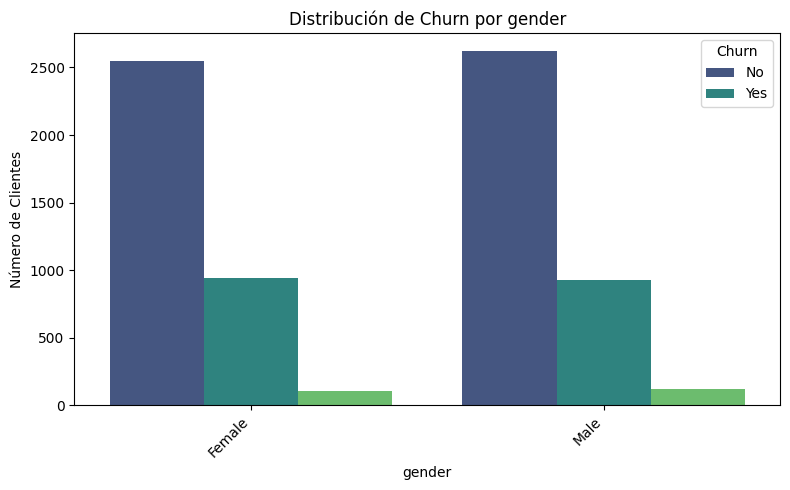

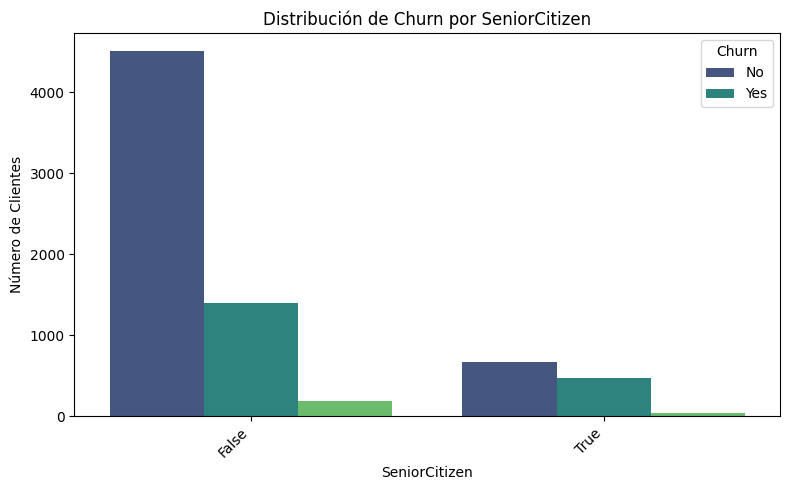

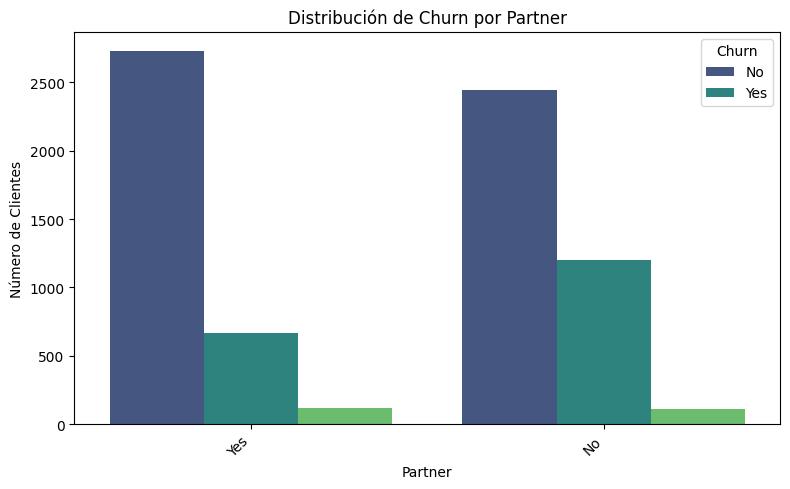

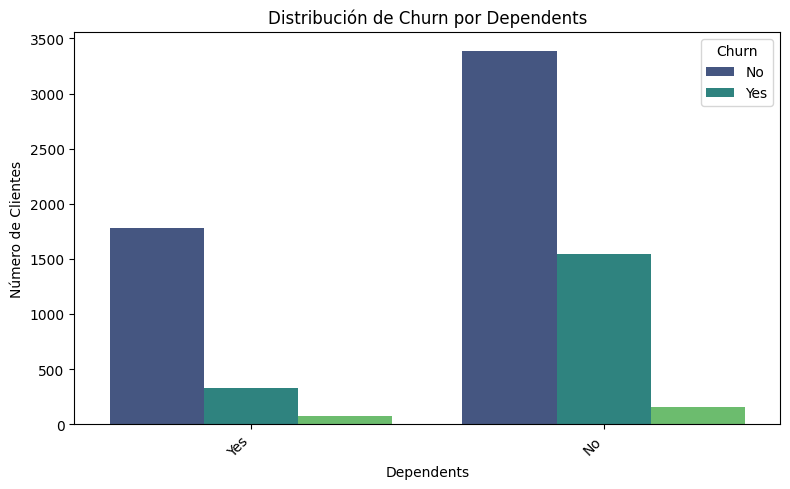

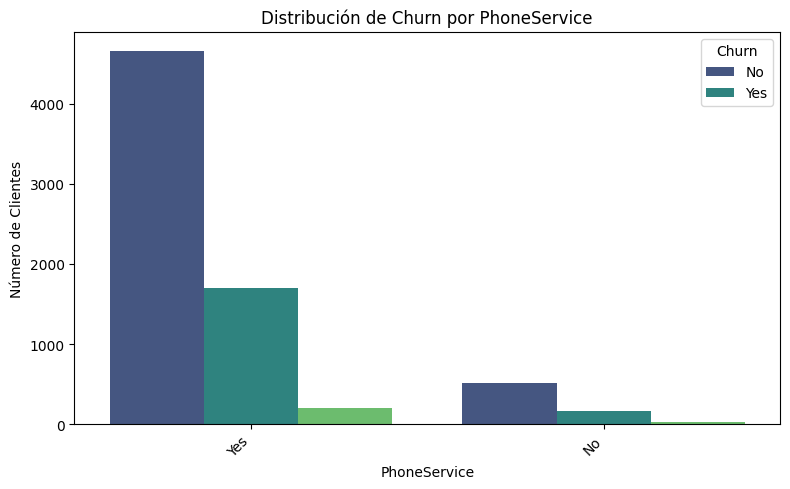

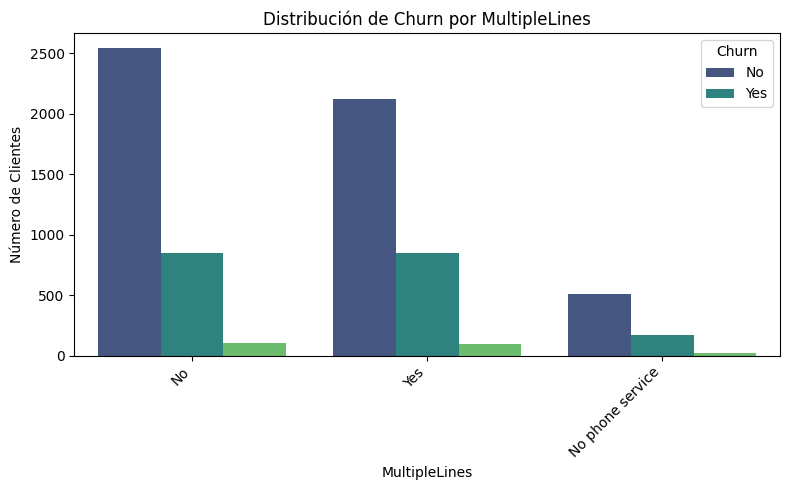

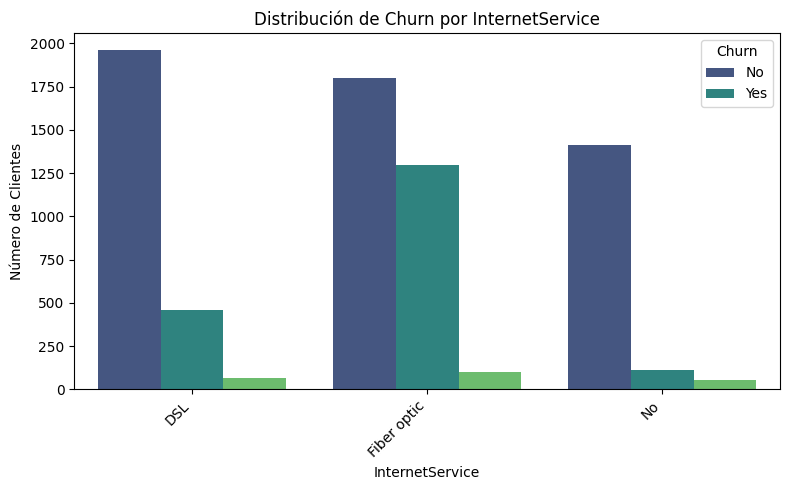

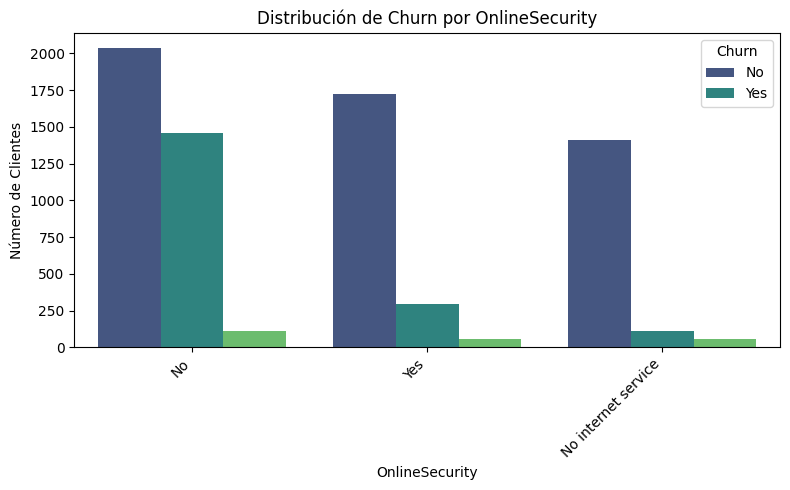

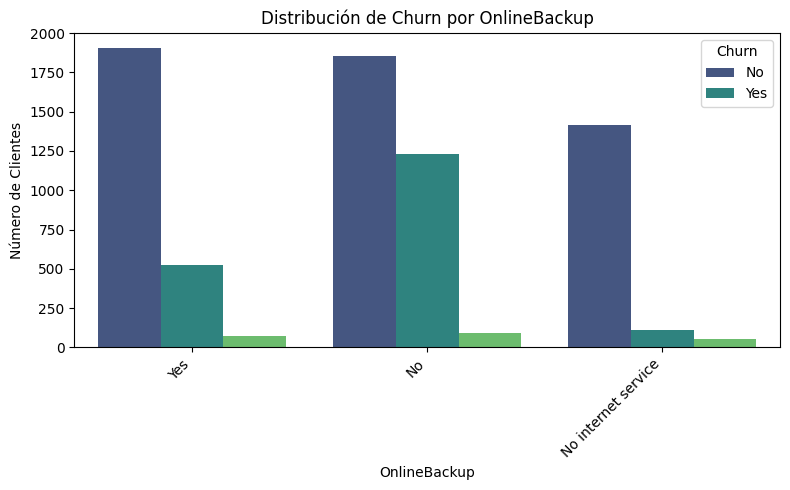

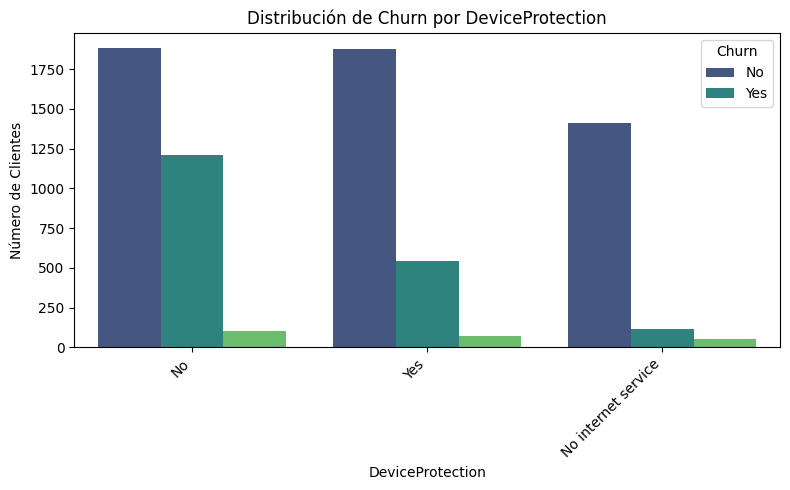

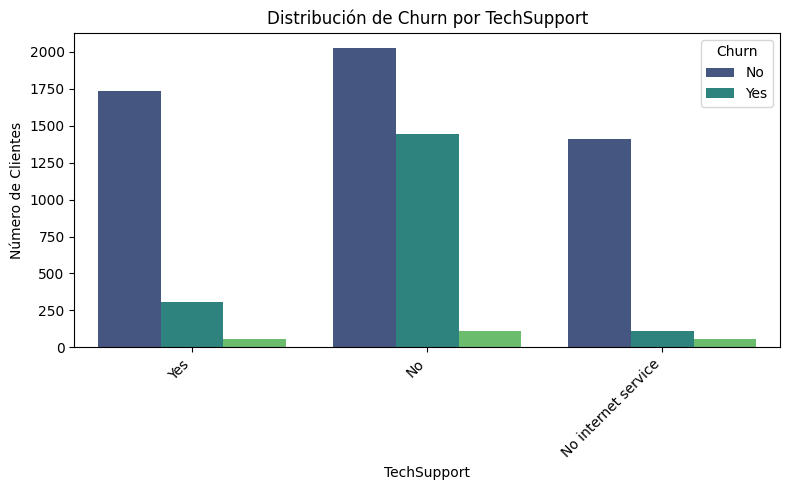

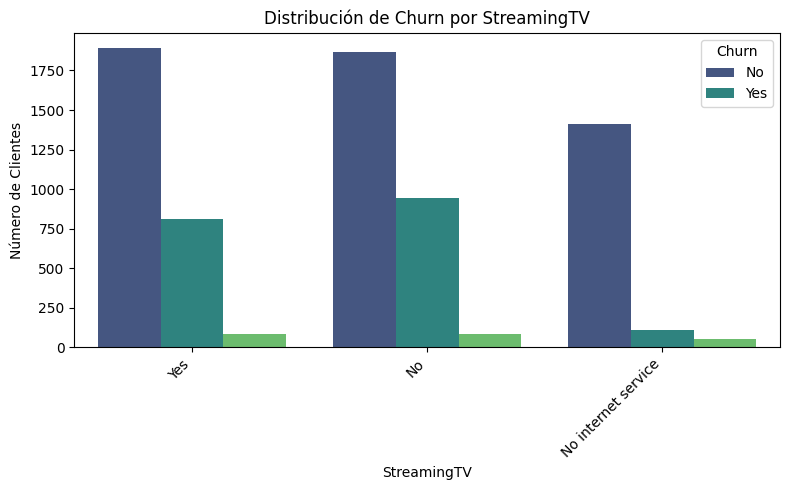

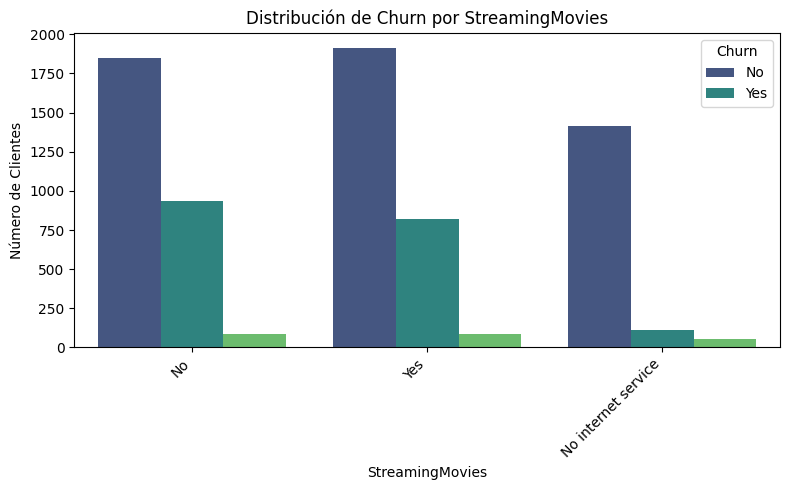

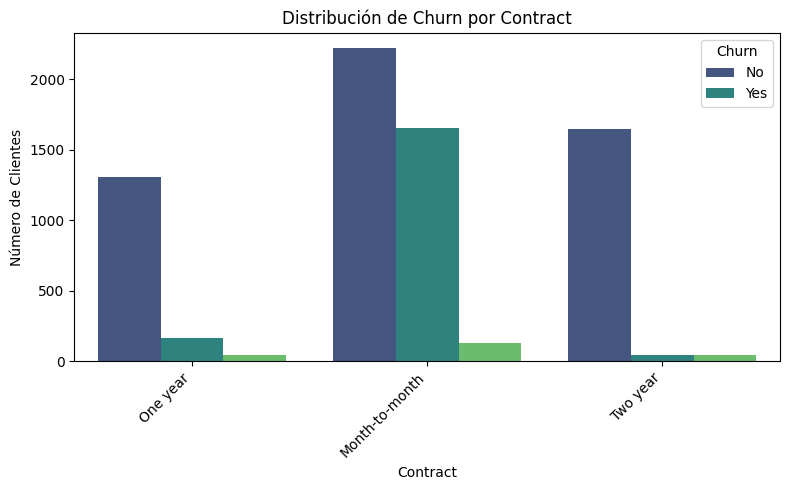

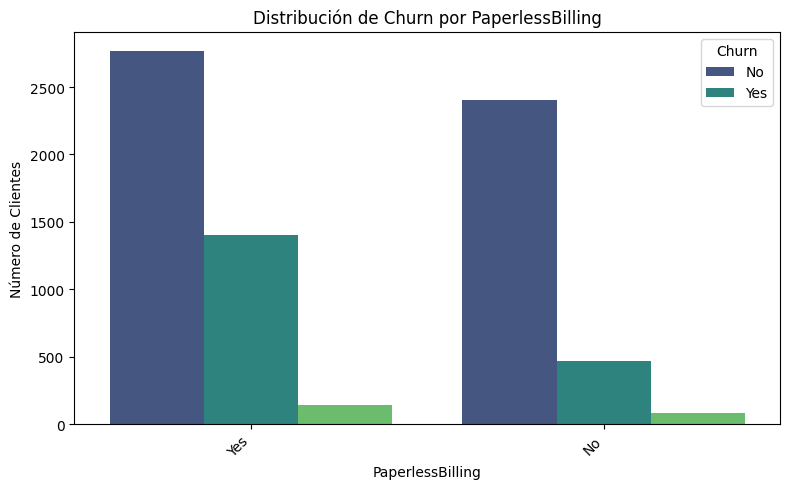

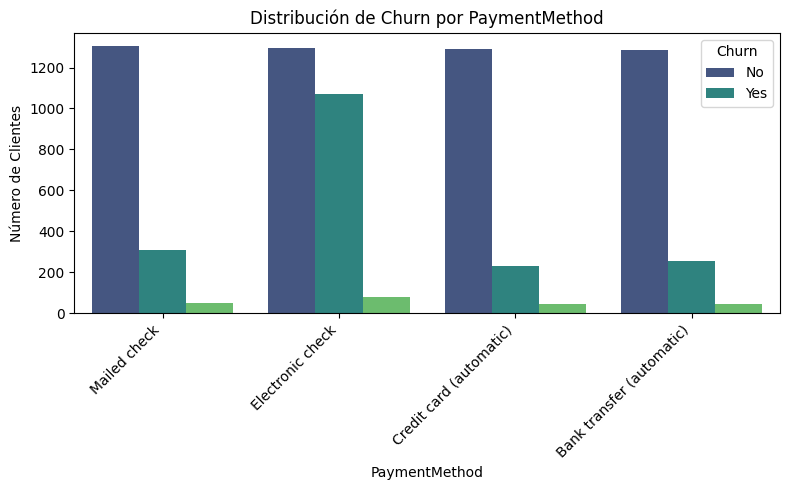

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar algunas columnas categóricas relevantes para el análisis de Churn
categorical_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

# Crear gráficos de barras para cada columna categórica mostrando la distribución de Churn
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_telecom_relevante, x=col, hue='Churn', palette='viridis')
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
    plt.tight_layout() # Ajustar diseño para evitar solapamiento
    plt.show()

# Conteo de evasión por variables numéricas

/tmp/ipython-input-37-74586973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')


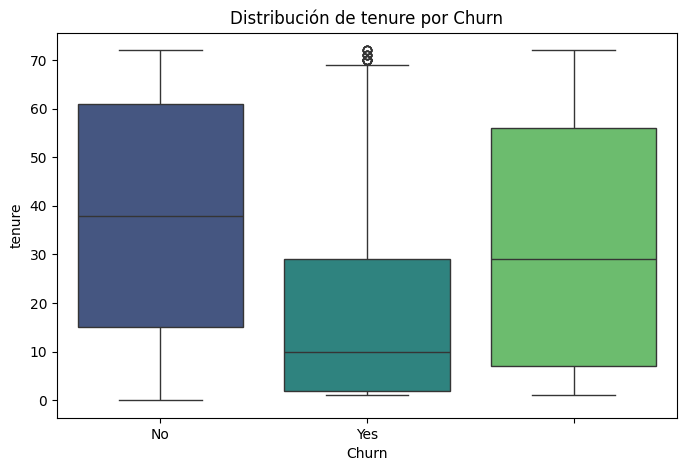

/tmp/ipython-input-37-74586973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')


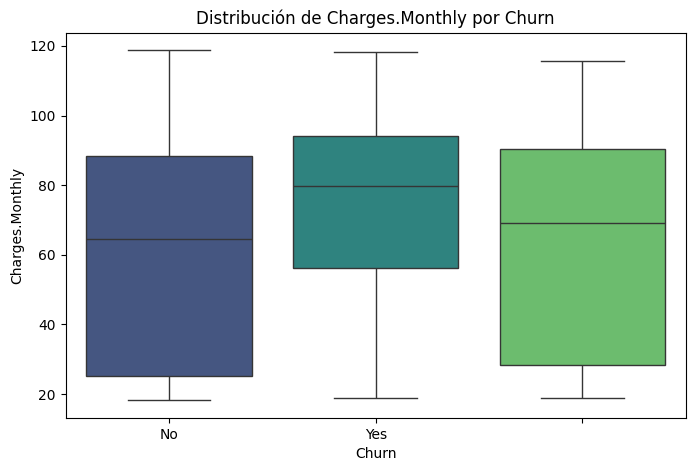

/tmp/ipython-input-37-74586973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')


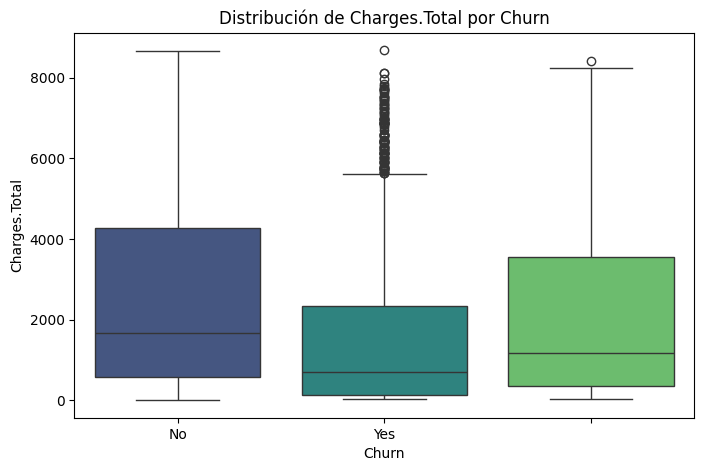

/tmp/ipython-input-37-74586973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')


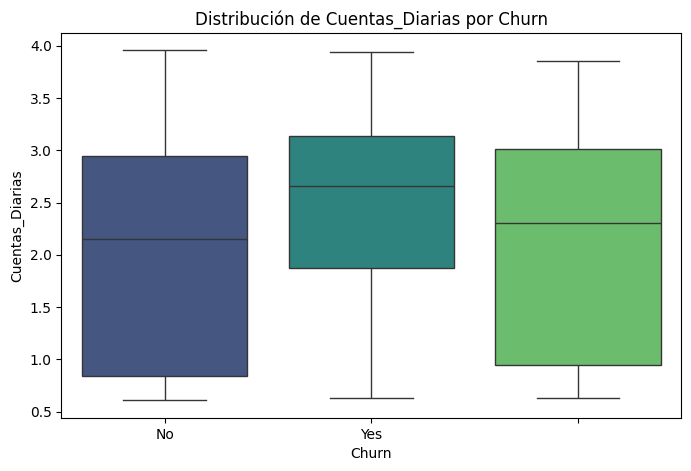

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas relevantes
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Crear box plots para cada columna numérica mostrando la distribución por Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

/tmp/ipython-input-38-3943283118.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')


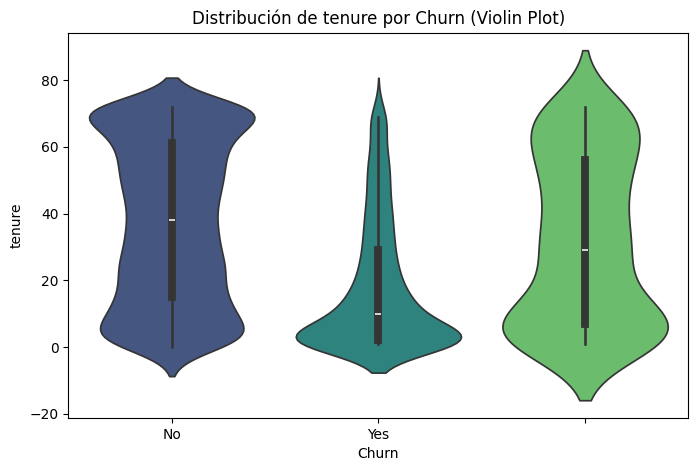

/tmp/ipython-input-38-3943283118.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')


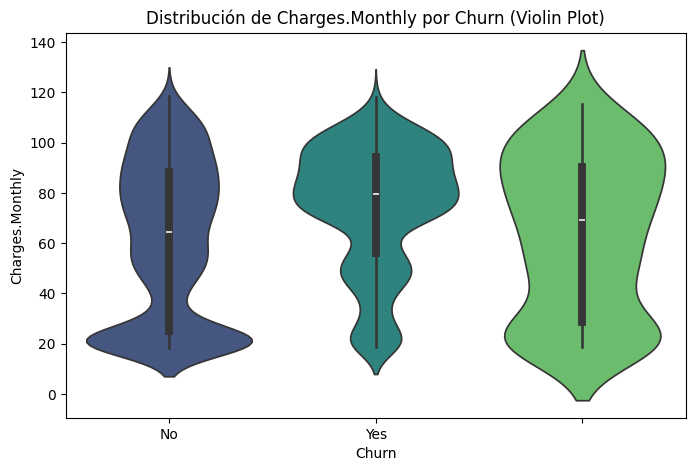

/tmp/ipython-input-38-3943283118.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante[df_telecom_relevante['tenure'] > 0], x='Churn', y=col, palette='viridis')


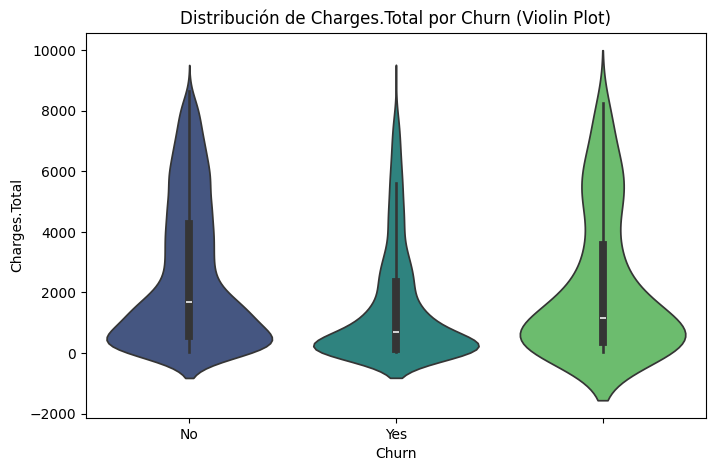

/tmp/ipython-input-38-3943283118.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')


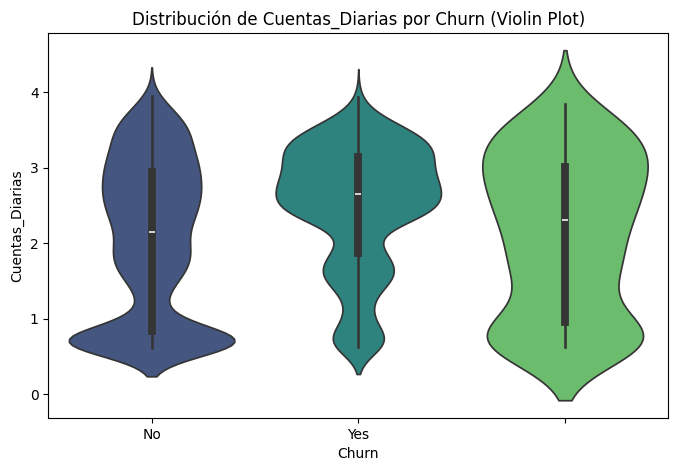

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas relevantes
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Crear gráficos de violín para cada columna numérica mostrando la distribución por Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    if col == 'Charges.Total':
        # For Charges.Total, exclude customers with tenure 0 as their total charges are 0 for a clearer visualization
        sns.violinplot(data=df_telecom_relevante[df_telecom_relevante['tenure'] > 0], x='Churn', y=col, palette='viridis')
    else:
        sns.violinplot(data=df_telecom_relevante, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Churn (Violin Plot)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

# **Informe Final**

# Informe de Análisis de Evasión de Clientes (Churn)

##  Introducción

El presente informe detalla un análisis exploratorio de datos (EDA) realizado sobre el dataset de clientes de TelecomX con el objetivo principal de comprender los factores que influyen en la evasión de clientes (Churn). La evasión de clientes representa un desafío significativo para las empresas de telecomunicaciones, impactando directamente en los ingresos y la rentabilidad. Identificar a los clientes propensos a irse y comprender las razones detrás de su decisión es crucial para implementar estrategias de retención efectivas y reducir la pérdida de clientes.

## Limpieza y Tratamiento de Datos

El proceso de análisis comenzó con la carga de los datos desde la API proporcionada. Inicialmente, el dataset contenía columnas con estructuras JSON anidadas, lo que dificultaba el análisis directo. Para abordar esto, se realizó la normalización de las columnas anidadas (`customer`, `phone`, `internet`, `account`) para extraer la información en columnas individuales, creando un DataFrame más plano y manejable (`df_telecom_expanded`).

Posteriormente, se seleccionaron las columnas identificadas como relevantes para el análisis de evasión (`df_telecom_relevante`). Durante la exploración de los datos, se identificó la presencia de valores inconsistentes en la columna `Charges.Total`, específicamente cadenas vacías (' ') que impedían su correcta conversión a tipo numérico. Se procedió a reemplazar estas cadenas vacías por 0.0 y a convertir la columna a tipo flotante para permitir cálculos numéricos. También se verificó y aseguró que la columna `SeniorCitizen` fuera de tipo booleano para un manejo adecuado. Finalmente, se creó una nueva característica, `Cuentas_Diarias`, calculada como los cargos mensuales divididos por 30, para obtener una estimación del costo diario para el cliente. Se confirmó la ausencia de valores nulos y duplicados en el DataFrame relevante.

## Análisis Exploratorio de Datos

Se realizó un análisis exploratorio exhaustivo para comprender la distribución de la evasión y su relación con las variables disponibles.

Primero, se visualizó la distribución general de la variable `Churn`. El gráfico de barras (referencia a la celda con el gráfico de distribución de Churn) mostró la proporción de clientes que permanecieron ('No') frente a los que se dieron de baja ('Yes'). Se observó que la mayoría de los clientes no han evadido el servicio, pero existe una proporción significativa de clientes que sí lo han hecho, lo que subraya la importancia de este análisis.

Luego, se exploró la relación entre las variables categóricas y `Churn`. Los gráficos de barras por cada variable categórica, segmentados por `Churn` (referencia a la celda con los gráficos de barras por variables categóricas), revelaron patrones interesantes:
*   **Género:** No parece haber una diferencia significativa en la tasa de evasión entre hombres y mujeres.
*   **SeniorCitizen:** Los ciudadanos mayores (`True`) parecen tener una tasa de evasión ligeramente mayor que los clientes más jóvenes (`False`).
*   **Partner y Dependents:** Los clientes sin pareja (`Partner = No`) y sin dependientes (`Dependents = No`) muestran una mayor tendencia a la evasión en comparación con aquellos que sí los tienen.
*   **PhoneService y MultipleLines:** La mayoría de los clientes tienen servicio telefónico. La presencia o ausencia de servicio telefónico no parece ser un fuerte predictor de evasión, pero tener múltiples líneas podría tener alguna influencia.
*   **InternetService:** Los clientes con servicio de Fibra Óptica (`Fiber optic`) muestran una tasa de evasión considerablemente más alta que aquellos con DSL o sin servicio de internet. Este es un hallazgo importante.
*   **Servicios Adicionales de Internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies):** Los clientes que no tienen estos servicios adicionales de internet (`No internet service` o `No`) tienden a evadir más que aquellos que sí los tienen. Esto sugiere que estos servicios adicionales contribuyen a la retención.
*   **Contract:** El tipo de contrato es un predictor muy fuerte. Los clientes con contratos mes a mes (`Month-to-month`) tienen una tasa de evasión drásticamente mayor en comparación con los contratos de uno o dos años.
*   **PaperlessBilling:** Los clientes que prefieren la facturación electrónica (`Yes`) parecen tener una tasa de evasión mayor.
*   **PaymentMethod:** El método de pago "Electronic check" muestra una tasa de evasión significativamente más alta que otros métodos de pago.

Finalmente, se examinó la relación entre las variables numéricas y `Churn` utilizando diagramas de violín (referencia a la celda con los gráficos de violín). Estos gráficos mostraron:
*   **tenure:** Los clientes que evaden (`Yes`) generalmente tienen una antigüedad (`tenure`) mucho menor en comparación con los clientes que no evaden (`No`). Esto es un indicador clave de que los clientes nuevos o con poca antigüedad son más propensos a irse.
*   **Charges.Monthly:** Los clientes que evaden tienden a tener cargos mensuales (`Charges.Monthly`) más altos, especialmente aquellos con servicios de fibra óptica y servicios adicionales.
*   **Charges.Total:** Los clientes que no evaden (`No`) tienen un total de cargos (`Charges.Total`) acumulado significativamente mayor que los clientes que evaden (`Yes`), lo cual es coherente con una mayor antigüedad.

## Conclusiones e Insights

El análisis exploratorio ha revelado varios insights clave sobre los factores asociados a la evasión de clientes en TelecomX:

*   **Antigüedad:** Los clientes con menor antigüedad son los más propensos a evadir.
*   **Servicio de Internet:** El servicio de Fibra Óptica está fuertemente asociado con una mayor tasa de evasión.
*   **Servicios Adicionales de Internet:** La falta de servicios de seguridad, respaldo, protección de dispositivos, soporte técnico y streaming está relacionada con una mayor probabilidad de evasión.
*   **Tipo de Contrato:** Los contratos mes a mes son un indicador muy fuerte de alta evasión.
*   **Método de Pago:** El pago mediante cheque electrónico tiene una asociación notable con la evasión.
*   **Cargos Mensuales:** Clientes con cargos mensuales más altos, a menudo asociados a servicios más completos (como fibra óptica y adicionales), tienen una mayor tendencia a evadir.

Estos hallazgos sugieren que la evasión no es aleatoria y está influenciada por la antigüedad del cliente, los servicios a los que está suscrito (especialmente el tipo de internet y los adicionales), el tipo de contrato y el método de pago.

## Recomendaciones

Basado en este análisis, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

1.  **Enfocarse en la Retención Temprana:** Implementar programas de bienvenida y estrategias de engagement intensivas para los clientes nuevos o con poca antigüedad (`tenure` bajo), ya que son los más vulnerables a la evasión.
2.  **Evaluar el Servicio de Fibra Óptica:** Investigar las posibles causas de la alta tasa de evasión entre los clientes de Fibra Óptica. ¿Hay problemas de calidad del servicio, soporte técnico, o expectativas no cumplidas? Se deben abordar proactivamente estas áreas.
3.  **Promover los Servicios Adicionales:** Incentivar la suscripción a servicios adicionales de internet (seguridad, respaldo, soporte técnico, etc.). Estos servicios parecen aumentar la retención. Se podrían ofrecer paquetes promocionales o descuentos para fomentar su adopción.
4.  **Fomentar Contratos a Largo Plazo:** Implementar incentivos para que los clientes opten por contratos de uno o dos años en lugar de mes a mes. Esto podría incluir descuentos en la tarifa mensual o beneficios adicionales.
5.  **Analizar el Método de Pago "Cheque Electrónico":** Investigar por qué los clientes que utilizan este método de pago tienen una mayor tasa de evasión. ¿Hay problemas con el proceso de pago, la facturación, o está asociado a un perfil de cliente particular?
6.  **Segmentar y Personalizar Ofertas:** Utilizar los insights obtenidos para segmentar a los clientes en riesgo (por ejemplo, clientes con contrato mes a mes, fibra óptica, sin servicios adicionales) y ofrecerles promociones o soporte personalizado para mejorar su satisfacción y fomentar la retención.
7.  **Monitorear Continuamente:** Establecer un sistema de monitoreo continuo de los indicadores clave de evasión identificados para detectar cambios en los patrones y ajustar las estrategias de retención según sea necesario.
